# Machine Learning :  Problem 6
## Classification using Logistic Loss function

## Disclaimer
These exercises are based on the Stanford Machine Learning Course [CS229](http://cs229.stanford.edu) of Andrew Ng. The environment of the exercise have been tuned to the theory content taught at Ravensburg Weingarten University.

We are using the Python programming language. If you don't know Python or if you would like to refresh your memory, take a look at the [Python tutorial](http://docs.python.org/tut/).
We will mostly work with NumPy, the fundamental package for scientific computing in Python. Please read the [NumPy quickstart tutorial](https://numpy.org/devdocs/user/quickstart.html). In addition, the documention of MatPlotLib and Scipy lib can be found here: .[MatplotLib](https://matplotlib.org/). [Scipy](https://docs.scipy.org/doc/scipy/reference/tutorial/).

Classification Problems are slightly different that regression problems. During regression we want to redict real valued quantities of Output Varibale (y). On the other hand, in classificaion problems we want to predict discrete valued quantities of (y). 

#### **binary classification :** $y \in {0,1}$ or  $y \in {-1,1}$

#### **multiclass classification :** $y \in {1,2,3,4,5,....k}$

Similarly, we cannot use the Mean Square Loss function because it will give ou an output with best fit of all given datapoints, whereas out requiremement is to segregate the two (or more) types of datapoints.

A number of alternative losses for classification are typically used instead. One of the most used is Logistic Loss function.

#### **Logistic Loss**: $L(h_w(x),y) = log( 1 + exp(-y*h_w(x)) )$

### 6.A Logistic Loss

As the first part of the problem, user needs to read the data given the '.txt' format. The given data is read with help us **pandas** command with appropritate delimiter specifications as seen in the given text file. 

#### See documention of the library at : https://pandas.pydata.org/

The data is stores in a variable with specific name tags for each row. To segregate the data the just call by name tags and store in Input and Output varibale respectively. Simulataneously, we define the solving paramters like Learning Rate and Convergency Criteria.

In [52]:
##########################################
##  HOCHSCHULE- RAVENSBURG WEINGARTEN   ##
##          Date: 25.09.2020            ##
##########################################

# Dependencies imported

# For vector computations and notations
import numpy as np 
# For Plotting
import matplotlib.pyplot as plt
import pandas as pd

############################
##       Read Data        ##
############################

# file in the same directory
data = pd.read_csv('./log_class_data.txt', names=['Exam 1', 'Exam 2', 'Admitted'])

# export pandas dataframe to numpy array
X = data[['Exam 1','Exam 2']].values 
y = data['Admitted'].values

# Regressions with logistics loss works better with Classification Outputs as {-1,1} (prevents underflow/
#..over flow). Change the outputlabel of y = 0 to y = -1

for b in range(len(y)):
    if y[b]==0: # for y = 0 labels only
        y[b]=-1 # change to y = -1

# Defining Solving Parameters
alpha = 0.8
acc = 10 ** -4

print('Total size of dataset is {} points'.format(y.size))

Total size of dataset is 100 points


#### Plotting is done using a python library 'matplotlib'. See documention of the library at https://matplotlib.org/

Text(0,0.5,'Exam 2')

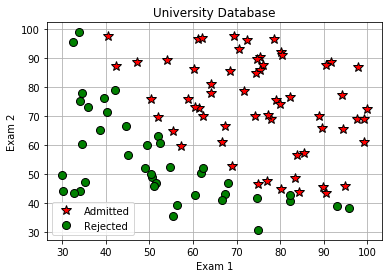

In [53]:
############################
##    Visualize Data      ##
############################

# Find Indices of Positive and Negative Examples, to visualize separately
pos = y == 1
neg = y == -1

# Plot Examples
plt.plot(X[pos, 0], X[pos, 1], 'k*', mfc='r',ms=10)
plt.plot(X[neg, 0], X[neg, 1], 'ko', mfc='g', ms=8)
plt.grid(b=None, which='major', axis='both')
plt.legend(['Admitted', 'Rejected'])
plt.title('University Database')
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')


### Normalizing Data

In the whole scope of Machine Learning, we deal with variable of different scalings. For example, X variable ranges in 10^4 whereas Y variable ranges from just 1 to 10. In this case, X variable will have a much larger weight in the calculations which will be dominated by X. This my very often results in erroneous prediction if not utterly false values. Transforming the data to comparable scales can prevent this problem. Typical data standardization procedures equalize the range and/or data variability. There are many methods to Normalize the data out of which we choose the following: 

$$
x''^{(i)} = \frac{x^{(i)} - min(X)}{max(X) - min(X)} 
$$

where $min(X)$ = minimum value in the whole set of Input Variable
and   $max(X)$ = minimum value in the whole set of Input Variable.

Similar transformation technique is applied to Output Variable(Y).


In [54]:
############################
##    Noramalize data     ##
############################

# Finding the max and min to normalize the data.
max_x1 = max(X[:,0])
min_x1 = min(X[:,0])
max_x2 = max(X[:,1])
min_x2 = min(X[:,1])

# Each data point in X and Y are normalized as follows
# New_x = (Old_x - Min_x) / (Max_x - Min_x) 

for f in range(len(X)):
    X[f,0] = (X[f,0] - min_x1) / (max_x1 - min_x1)

    X[f,1] = (X[f,1] - min_x2) / (max_x2 - min_x2)


### Adding Bias Term

Just as we did in LR  we do the similar procedure for adding the bias term, adding a column of **1s** to every element of input datapoint.

$$
\phi = \left(\begin{array}{cc} 
X \\
1
\end{array}\right)
$$

In [55]:
# add bias
X = np.hstack((X,np.ones((X.shape[0],1))))

# Size of data
m = y.size

### Update Equations

In this particular problem we are using the linear hypothesis function (which is dot product of weight vector and feature vector).

$$
h_w(x) = w^T.\phi
$$

The objective of gradient descent is to minimize the Logistic loss (which was defined above):

$$
J(w) = \frac{1}{m}\sum_{i=1}^m log( 1 + exp(-y_i*h_w(x_i)) )
$$

The parameters of the model are the $w_j$ values. 
These are the values that we will adjust to minimize the gradient of Loss function. This will be done using the gradient descent algorithm which performs the update:

$$
\begin{align}
w_j &= w_j - \frac{\alpha}{m} \frac{\partial J(w)}{\partial w_j} 
\end{align}
$$

In [56]:
############################
##    Hypothesis Func     ##
############################

def h(w,x): 
    
    return np.dot(x,w)

### Implementing gradient descent

Now that we have the hypothesis and the loss function we can implement the gradient descent routine. First, write a function $\nabla J(w)$ which returns the gradient of the Logistic loss function. The gradient is just a vector with all the partial derivatives

$$
\nabla J(w) = \bigg[\frac{\partial J(w)}{\partial w_1} , \dotsc, \frac{\partial J(w)}{\partial w_d} \bigg]^T
$$
where
$$
\frac{\partial J(w)}{\partial w_j} = \frac{1}{m} \sum_{i=1}^m \big( \frac{-y_i*x_i}{1 + exp(y_i*h_w(x_i))} \big) 
$$

Below is a function with the inner part of the summation symbol. The addition for m samples can be done in the main function.

In [57]:
############################
##   Gradient Function    ##
##    (Log Loss Func)     ##
############################

def log_gradient(x,w,y):

    # Valid for Logarithmic Loss func only
    # See analytical solution in slide

    log_grad = -y*x/(1+ np.exp(y*h(w,x)))
    
    return log_grad

For the main function, user can deploy the Pseudo code as seen in lecture.

You will implement gradient descent in the function `gradient_descent(x,y,w,acc,alpha)`.
Recall the update rule of gradient descent which is

$$
w^{(k+1)} = w^{(k)} - \alpha \nabla J(w^{(k)})
$$


In [59]:
############################
##    Gradient Descent    ##
############################

def gradient_decent(x,y,w,acc):
    global m, itr

    delta_w = np.array([1,1,1]) # initialized randomly

    itr = 0
    while all(acc < abs(a) for a in delta_w):
        
        log_g = 0

        # Compute Cumulative gradient
        for a in range(m):

            # Gradient computation is Normalized by number of data points available
            log_g = log_g + log_gradient(X[a],w,y[a])/m
            a = a+1
        
        # Modify weight
        delta_w = alpha * log_g
        # alpha is learning rate
        w = w - (delta_w)
        
        itr = itr+1
        
    return w, itr


#Initiate randomized weight verctor
w = np.array([0,0,0])

# Display the obtained results
log_weight, log_itr = gradient_decent(X,y,w,acc)

print('The optimized weight vector is {}.'.format(log_weight))
print('Solving criteria with Log Loss Func: Convergency = {} and Learining Rate = {}'.format(acc,alpha))
print('Total iterations done = {}'.format(log_itr))

The optimized weight vector is [ 13.99844829  13.36784788 -12.44021754].
Solving criteria with Log Loss Func: Convergency = 0.0001 and Learining Rate = 0.8
Total iterations done = 9189


#### The algorithm will run its course and after each iteration the weight vector will be modified to get a lower Gradient of the Sqaured Loss function. Finally the weight vector is converged.

### Plotting the classification line

To plot the classfication line it is sufficent to just plot 2 points and connect them. We do it by finding the **max** and **min** values from each vector set of X (Input) array.

In [62]:
# Find min and max points
x_min, x_max = X[:, 0].min(), X[:, 0].max()
plot_x1 = np.array([x_min, x_max])

To define a classification line, we consider that the probabilty of the Output Class (y) of a given Input Point (X') is 1/2. We say that Class of a given data point is determined by 

$$y* = sign(h_w(X'))$$. 

With this consideration we can say that equation of line can be determined by follwing:

$$h_w(X') = 0$$ 

Expanding the above equation we get:

$$
w_0* (X')_0 + w_1* (X')_1 + w_2
$$

Since we already identitifed the **max** and **min** points two plot the line, we can compute the y-axis co-ordinate by following equation:

$$
(X')_1 = \frac{-(w_0 * (X')_1 + w_2)}{w_1} 
$$

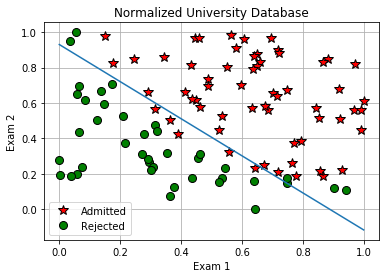

In [63]:
# Compute the y axis point from the learned weights
plot_x2 = (-1 / log_weight[1]) * (log_weight[0] * plot_x1 + log_weight[2])

plt.plot(X[pos, 0], X[pos, 1], 'k*', mfc='r',ms=10)
plt.plot(X[neg, 0], X[neg, 1], 'ko', mfc='g', ms=8)
plt.plot(plot_x1, plot_x2)
plt.grid(b=None, which='major', axis='both')
plt.legend(['Admitted', 'Rejected'])
plt.title('Normalized University Database')
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.show()

### 6.B Make predictions

With the learned model, we can predict the class of an unknown data point. Suppose we want to predict if a student with Exam_1 score = 40 and Exam_2 score = 80 will fall under the **Admitted** or **Rejected** class. 

The class can be predicted by computing the sign of hypothesis function value. Ee do the similar procedure for adding the bias term, adding a column of 1s to every element of unknown input datapoint. 

$$
Class = sign(h_w(x*))
$$

In [64]:
############################
##      Unknown Data      ##
############################

# We store the new unknown data as feature vector. 
x_new = np.array([70.0,67.0,1.0])

# Normalizing
x_new[0] = (x_new[0] - min_x1) / (max_x1 - min_x1)
x_new[1] = (x_new[1] - min_x1) / (max_x1 - min_x1)

print('The test point is: {}'.format(x_new))

# To find the class of new point, we need to compute the hypothesis value.
# Class is dependent on the sign of the obtained value.
cat = np.sign(np.dot(log_weight, x_new))

# Relate the sign of the value to a category
# Class = 1 = Admitted, Class = -1 = Rejected 

if cat == 1:
    print('Student Admitted; Class 1')

if cat == -1:
    print('Student Rejected; Class -1')

The test point is: [0.57247714 0.52947812 1.        ]
Student Admitted; Class 1


### 6.C Model Accuracy

In the result of part A, we say the our classifier doesn't exactly classifiy al the points correctly. One reason could be that the given dataset is not linearly separable and we may have to resort to nonlinear classification algorithm for this. 

But it would a good idea to measure (and compare) the Quality of Classifier. After the weights are learned, we can use them to predict the class of our given input points. We them compare the **Predicted Class label** with the **Given Class label**. If they match, then there is no problem. If they differ, we consider that as a false prediction by our  model. To compute the Accuracy of our model take ratio of Correctly classified points and Total Points in training dataset.

$$
Accuracy = 1 - \frac{wrong}{Total} 
$$

wrong = incorreclty classified points

Total = Total points in training dataset

In [65]:
###################################
##  Model's Prediction Accuracy  ##
###################################

# Compute the prediction of each Input Point and store in a new array.
y_new = np.array([])

for each in X:
    y_temp = np.sign(np.dot(log_weight, each))
    y_new = np.append(y_new, [y_temp])

# Compare the predicted value with the Actual Output label class. If doesn't match, consider...
#... this as wrong prediction
wrong = 0

for p in range(m):
    if y[p] != y_new[p]:
        wrong = wrong + 1

# Accuracy = (Correct_predictions / Total Predictions) * 100 %
print('Accuracy of Learned model is {} %.'.format(100- (100*wrong/m)))

Accuracy of Learned model is 89 %.


## What can you contribute to this notebook ?